*Seashells basic installation and tutorial*

In [39]:
import numpy as np
import pandas as pd
import scanpy as sc
import SEACells as sea

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100

In [41]:
# adata = sc.datasets.pbmc3k_processed()
# adata

adata = sc.read_h5ad('./write/GSE148218_processed.h5ad')
adata

/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 53007 × 22130
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

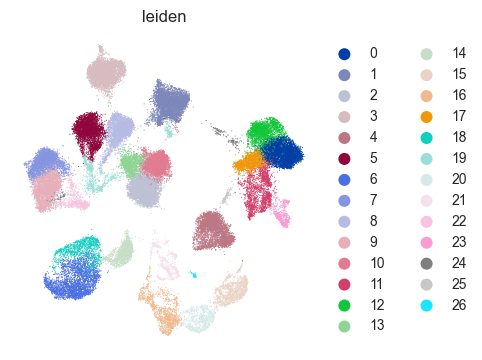

In [42]:
sc.pl.scatter(adata, basis='umap', color='leiden', frameon=False)


In [43]:
# Normalize cells, log transform and compute highly variable genes
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=1500)

/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [44]:
sc.tl.pca(adata, n_comps=50, use_highly_variable=True)
adata

AnnData object with n_obs × n_vars = 53007 × 22130
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'n_counts'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [45]:
## User defined parameters

## Core parameters 
n_SEACells = 80
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [46]:
sea.SEACells(adata,build_kernel_on=build_kernel_on,n_SEACells=n_SEACells, n_waypoint_eigs=n_waypoint_eigs, convergence_epsilon = 1e-5)

AttributeError: module 'SEACells' has no attribute 'SEACells'